# Loan Eligibility prediction

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import OrdinalEncoder

In [91]:
#load the data
dataset = pd.read_csv(r'D:\Course\Brainworks\Python_Practice\Projects\ML_Projects\SVM\Loan_prediction\loan_pred.csv')

In [143]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [12]:
dataset.shape

(614, 13)

In [125]:
#dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 62.5+ KB


In [46]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [127]:
#1.Age column - mode operation
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)

In [128]:
#2.Married column - mode operation
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)

In [129]:
#3.Filling null values in Dependents column to 0
dataset['Dependents'].fillna(0, inplace=True)

In [130]:
#4.Self Employed - mode operation
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)

In [131]:
#5.LoanAmount - mean operation
mean_values = dataset['LoanAmount'].mean()
dataset['LoanAmount'].fillna(mean_values, inplace=True)

In [132]:
#6.Loan_Amount_Term - mode operations
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)

In [133]:
#7.Credit_History - mode operations
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

In [134]:
dataset['Dependents'].value_counts()

0    345
1    102
2    101
4     51
0     15
Name: Dependents, dtype: int64

In [135]:
dataset['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [136]:
dataset.replace({'Gender':{'Male':1, 'Female':0}}, inplace=True)

In [137]:
dataset.replace({'Married':{'No':0, 'Yes':1}}, inplace=True)

In [138]:
dataset.replace({'Education':{'Not Graduate':0, 'Graduate':1}}, inplace=True)

In [139]:
dataset.replace({'Self_Employed':{'No':0, 'Yes':1}}, inplace=True)

In [140]:
dataset.replace({'Property_Area':{'Urban':2, 'Semiurban':1, 'Rural':0}}, inplace=True)

In [141]:
dataset.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace=True)

In [142]:
dataset = dataset.replace(to_replace='3+', value=4)

<AxesSubplot:xlabel='Education', ylabel='count'>

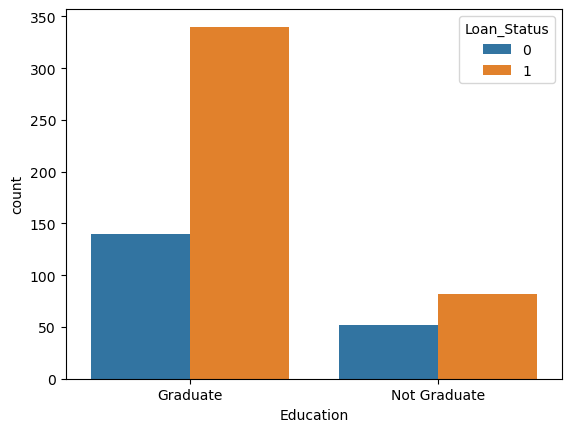

In [105]:
sns.countplot(x = 'Education', hue='Loan_Status', data=dataset)

Text(0.5, 1.0, 'Correlation Heatmap')

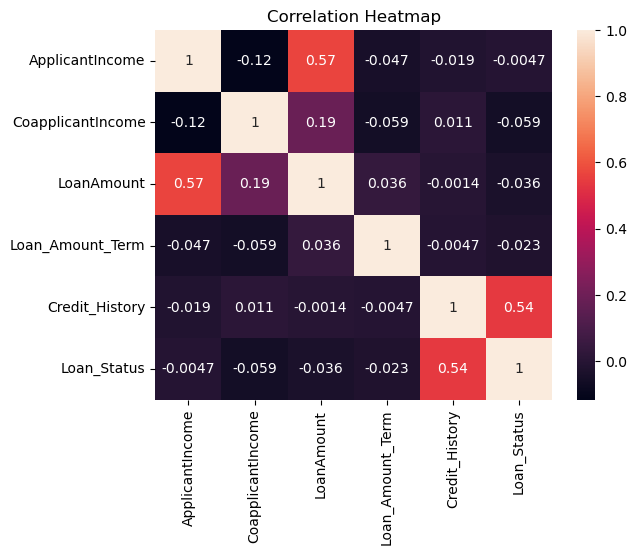

In [108]:
correlation = dataset.corr()
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap')

In [144]:
#seperating input and target variables
x = dataset.drop(columns=['Loan_ID', 'Loan_Status'],axis=1)
y = dataset['Loan_Status']

In [146]:
#Train Test amd Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=5)

In [147]:
#Training the model using Support Vector Machine
classifier = svm.SVC(kernel='linear')

In [148]:
#training Support Vector Machine Model
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [149]:
#finding accuracy score on training data
x_train_pred = classifier.predict(x_train)

In [154]:
pred = accuracy_score(x_train_pred, y_train)
pred

0.8126272912423625

In [155]:
x_test_pred = classifier.predict(x_test)

In [158]:
score = accuracy_score(x_test_pred, y_test)
score

0.7886178861788617

In [159]:
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')